In [3]:
#coding:utf-8

import research
reload(research)
import corrlab
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

train_start, train_end = '20171114', '20171114'
test_start, test_end = '20171115', '20171115'
period, lag, target = '1s', '1s', 'ru0'
type = 0

rs = research.simu(train_start, train_end,test_start, test_end, period, lag, target, type = type)

train, test = rs.get_train_test()
train_volu, test_volu = rs.get_train_test_volu()


In [4]:
# train_volu, test_volu = rs.get_train_test_volu()
sampled_train, sampled_test = rs.sample(train, test)
shifted_train, shifted_test = rs.shift(sampled_train, sampled_test)

sampled_train_volu, sampled_test_volu = rs.sample(train_volu, test_volu)
shifted_train_volu, shifted_test_volu = rs.shift(sampled_train_volu, sampled_test_volu)

In [64]:

train_col = rs.filterSymbol(shifted_train,target, threshold=0, abs_or_not = True)
train_volu_col = [col+'_volu' for col in train_col]

combine = pd.concat([shifted_train, shifted_train_volu],axis = 1)   #combne return data and volu data
combine_col = rs.filterSymbol(combine, target,threshold=0.15)

test_combine = pd.concat([shifted_test, shifted_test_volu],axis = 1)  

In [67]:
lso = LassoCV(normalize=True,max_iter=50000,eps = 0.0001,n_alphas=200,cv=10,n_jobs=-1,tol = 1e-8)
lso.fit(combine[combine_col], combine[target])
lso_score = lso.score(combine[combine_col], combine[target])
print 'lso score is:', lso_score
print 'lso alpha is:', lso.alpha_
lso_train_pred = lso.predict(combine[combine_col])
lso_train_pred_class = rs.calssConvert(lso_train_pred)
flag = (shifted_train[target] != 0).values
train_class = rs.calssConvert(shifted_train[target].values)
lso_train_accu = np.mean(np.array(train_class)[flag] == np.array(lso_train_pred_class)[flag])
print 'classify accuarcy on train set is:',lso_train_accu


lso score is: 0.299898613055
lso alpha is: 5.38694844067e-11
classify accuarcy on train set is: 0.802973977695


In [55]:
coef = pd.DataFrame(lso.coef_)
coef.index = combine_col
coef.columns=['coef']
coef['corr'] = [combine.corr()[target][i] for i in combine_col]
coef

,coef,corr
al0,2.622379e-01,0.435757
c10,-1.723899e-01,-0.384860
a10,2.428602e-01,0.337726
OI0,1.733624e-01,0.303042
SF0,-6.787208e-02,-0.268679
cs0_volu,1.827036e-08,0.194015
c10_volu,-7.304274e-09,-0.163424
ni0_volu,4.240076e-07,0.287110
ru0_volu,6.184863e-07,0.202933
CF0_volu,1.872564e-07,0.268540


In [66]:

lso_score = lso.score(test_combine[combine_col], test_combine[target])
print 'lso score is:', lso_score

lso_test_pred = lso.predict(test_combine[combine_col])
lso_test_pred_class = rs.calssConvert(lso_test_pred)
flag = (shifted_test[target] != 0).values
test_class = rs.calssConvert(shifted_test[target].values)
lso_test_accu = np.mean(np.array(test_class)[flag] == np.array(lso_test_pred_class)[flag])
print 'classify accuarcy on test set is:',lso_test_accu


lso score is: -9.94769386177
classify accuarcy on test set is: 0.597362296354


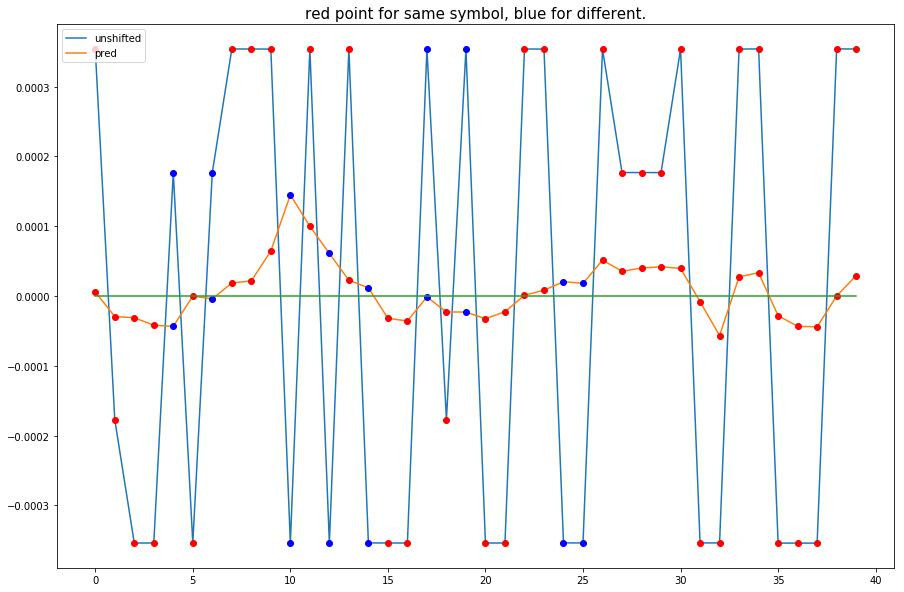

In [68]:
rs.contrast_sca(np.array(lso_train_pred)[flag], shifted_train[target].values[flag],1850,1890,coef=1,figsize=(15,10))

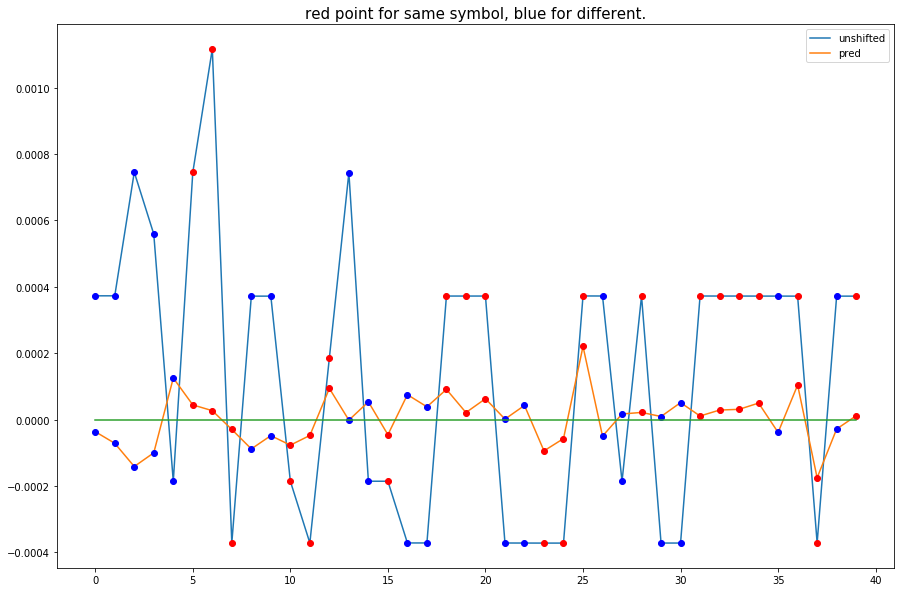

In [31]:
rs.contrast_sca(np.array(lso_test_pred)[flag], shifted_test[target].values[flag],50,90,coef=1,figsize=(15,10))

In [13]:
lso = LassoCV(normalize=True,max_iter=50000,eps = 0.0001,n_alphas=20,cv=10,n_jobs=-1,tol = 1e-8)
lso.fit(shifted_train[train_col], shifted_train[target])
lso_score = lso.score(shifted_train[train_col], shifted_train[target])
print 'lso score is:', lso_score
print 'lso alpha is:', lso.alpha_
lso_train_pred = lso.predict(shifted_train[train_col])
lso_train_pred_class = rs.calssConvert(lso_train_pred)
flag = (shifted_train[target] != 0).values
train_class = rs.calssConvert(shifted_train[target].values)
lso_train_accu = np.mean(np.array(train_class)[flag] == np.array(lso_train_pred_class)[flag])
print 'classify accuarcy is:',lso_train_accu


lso score is: 0.27690834523
lso alpha is: 5.38694844067e-11
classify accuarcy is: 0.736059479554


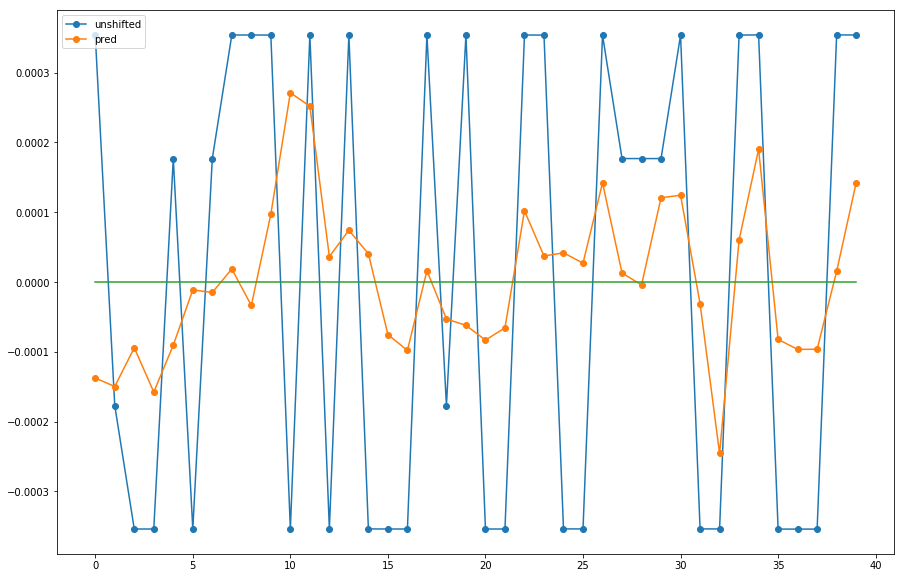

In [7]:
rs.contrast(np.array(lso_train_pred)[flag], shifted_train[target].values[flag],1850,1890,coef=3,figsize=(15,10))

In [25]:

elncv = ElasticNetCV(l1_ratio = 1, eps = 1e-3, max_iter=5000,n_alphas = 300, alphas = [0.002,0.001], normalize= True, cv  = 10, n_jobs = -1)
elncv.fit(combine[combine_col], combine[target])
eln_socre = elncv.score(combine[combine_col], combine[target])
print 'ElasticNet score is:', eln_socre
print 'ElasticNet alpha is:', elncv.alpha_
elncv_train_pred = elncv.predict(combine[combine_col])
flag = (sampled_train[target] != 0).values
elncv_pred_class = rs.calssConvert(elncv_train_pred)
elncv_train_accu = np.mean(np.array(train_class)[flag] == np.array(elncv_pred_class)[flag])
print 'class accuarcy is:',elncv_train_accu

ElasticNet score is: 0.0
ElasticNet alpha is: 0.002
class accuarcy is: 0.683188764973


In [31]:
from sklearn.tree import DecisionTreeRegressor as DTR
dtf = DTR(max_depth=30)
dtf.fit(combine[combine_col], combine[target])
dtf.score(combine[combine_col], combine[target])
dtf_pred = dtf.predict(combine[combine_col])


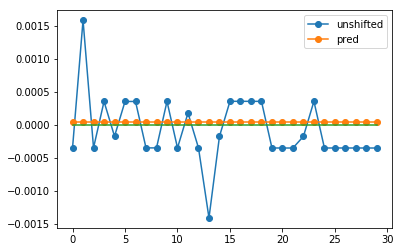

In [32]:
rs.contrast(np.array(dtf_pred)[flag], sampled_train[target].values[flag],0,30,coef=2)

In [11]:
shifted_train.corr()[target]['cu0']

0.042523516762242773